In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.neighbors import LocalOutlierFactor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [7]:
df_scores = clf.negative_outlier_factor_
scores = np.sort(-df_scores[:])

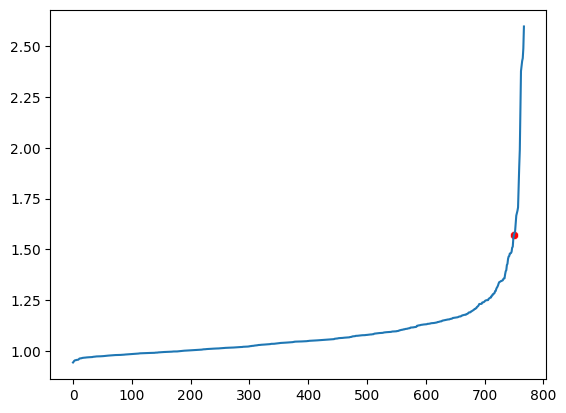

In [8]:
sns.lineplot(x=np.arange(len(scores)), y=scores);
sns.scatterplot(x=[750], y=scores[750], color="red");

In [9]:
esik_deger = -scores[750]
esik_deger

-1.5721145432225694

In [10]:
aykiri_degerler = df_scores > esik_deger
df = df[aykiri_degerler]

In [11]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X.shape, y.shape

((750, 8), (750,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [13]:
# Model

In [14]:
gbm = GradientBoostingClassifier().fit(X_train, y_train)

In [15]:
gbm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [16]:
gbm.score(X_test, y_test)

0.7712765957446809

In [17]:
y_pred = gbm.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.7712765957446809

In [19]:
# Model Tuning

In [20]:
gbm_params = {
    "learning_rate": [0.01, 0.1, 0.3, 0.5],
    "n_estimators": [100, 300, 500, 1000],
    "max_depth": [2, 3, 5, 8]
}
gbm = GradientBoostingClassifier()

In [21]:
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [2, 3, 5, 8],
                         'n_estimators': [100, 300, 500, 1000]},
             verbose=2)

In [26]:
gbm_cv.score(X_test, y_test)

0.7872340425531915

In [27]:
gbm_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

In [29]:
# Final Modeli

In [30]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=300)
gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300)

In [32]:
gbm_tuned.score(X_test, y_test)

0.7872340425531915

In [33]:
# Değişkenleri Gözlemleme

In [36]:
gbm_tuned.feature_importances_

array([0.03739256, 0.45517411, 0.03434802, 0.00479529, 0.03308466,
       0.20928416, 0.09171104, 0.13421015])

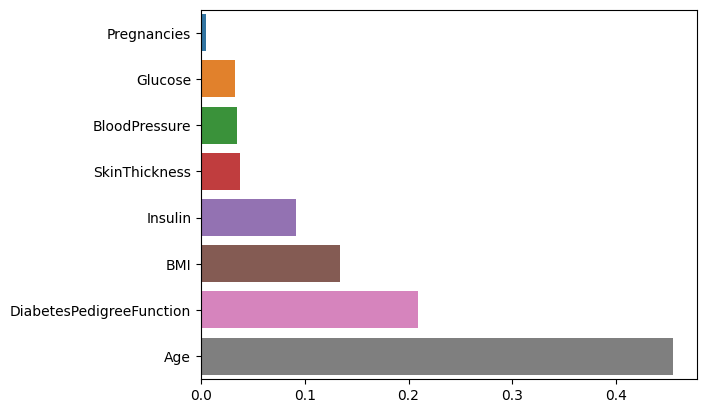

In [37]:
sns.barplot(y=X.columns, x=np.sort(gbm_tuned.feature_importances_,));
# Değişkenlerin Önem Düzeyleri